In [1]:
import semicon
import sympy
sympy.init_printing()

# continuum dispersion

In [2]:
import kwant
import numpy as np
import scipy.linalg as la

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
a = 0.5
g0 = 1

bands = ['gamma_6c', 'gamma_8v', 'gamma_7v']

ham = semicon.models.foreman(components=['foreman'], bands=bands)
params = semicon.parameters.bulk(
    bank='winkler', 
    material='InAs', 
    new_gamma_0=g0, 
    bands=bands, 
    extra_constants=semicon.parameters.constants
)

# define continuum dispersion function
continuum = kwant.continuum.lambdify(str(ham), locals=params)


# define tight-binding dispersion function
template = kwant.continuum.discretize(ham, grid_spacing=a)
syst = kwant.wraparound.wraparound(template).finalized()
p = lambda k_x, k_y, k_z: {'k_x': k_x, 'k_y': k_y, 'k_z': k_z, **params}
tb = lambda k_x, k_y, k_z: syst.hamiltonian_submatrix(params=p(k_x, k_y, k_z))


# get dispersions
k = np.linspace(-np.pi/a, np.pi/a, 101)
e = np.array([la.eigvalsh(continuum(k_x=ki, k_y=0, k_z=0)) for ki in k])
e_tb = np.array([la.eigvalsh(tb(k_x=a*ki, k_y=0, k_z=0)) for ki in k])


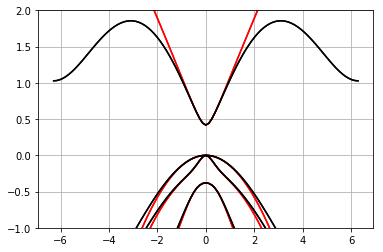

In [4]:
plt.plot(k, e, 'r-');
plt.plot(k, e_tb, 'k-');

plt.ylim(-1, 2)
plt.grid();